##                          Exploratory Data Analysis For Stroke Prediction

Performing the exploratory data analysis to understand the corelation between the different biological factors and stroke.


#### Import required python libraries

In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.model_selection as train_test_split
from sklearn import linear_model, preprocessing
from scipy.stats import spearmanr

#### Load stroke data

In [6]:
#Load the data
stroke_data = pd.read_csv('../data/stroke_data_cleaned.csv')

#### Data summary

In [7]:
#Checking first 5 rows of the data
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
#Checking the number of rows and columns
stroke_data.shape

(5109, 12)

In [9]:
#Checking the datatype and checking for the missing values
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


#### Data Exploration

In [10]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
#Remove the id column since it is of no significance 
stroke_data.drop(["id"],axis=1,inplace=True)
stroke_data.shape

(5109, 11)

In [12]:
#Checking the row values corresponding to the missing BMI values 
stroke_data.loc[stroke_data['bmi'].isna() & stroke_data['stroke'] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


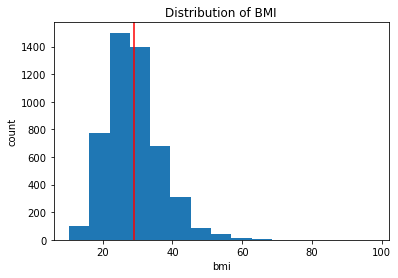

In [13]:
#Checking the distribution of the BMI data
plt.hist(stroke_data['bmi'], bins=15,)
plt.title('Distribution of BMI')
plt.xlabel('bmi')
plt.ylabel('count')
plt.axvline(stroke_data['bmi'].mean(), color='r')
plt.show()

#### Observation: 
    
    The 'bmi' field has 4908 values compared to 5109 for other features indicating missing values. 
    The data values for the row corresponding to the missing BMI values were checked.
    The other data values are looking in good shape with no dummy entries and are relevant.
    These rows must not be dropped.
    Most of the values in the BMI column are distributed around the mean thus it is safe to replace the missing values can using the mean of existing BMI values.

In [14]:
#Replacing the missing values of bmi with mean of bmi
stroke_data['bmi'].fillna(np.round(stroke_data['bmi'].mean(),1), inplace=True)
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


In [15]:
stroke_data.shape

(5109, 11)

In [16]:
#Check the corelation between the variables
stroke_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325871,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160163,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038879,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168926,0.131991
bmi,0.325871,0.160163,0.038879,0.168926,1.000000,0.038936
stroke,0.245239,0.127891,0.134905,0.131991,0.038936,1.000000


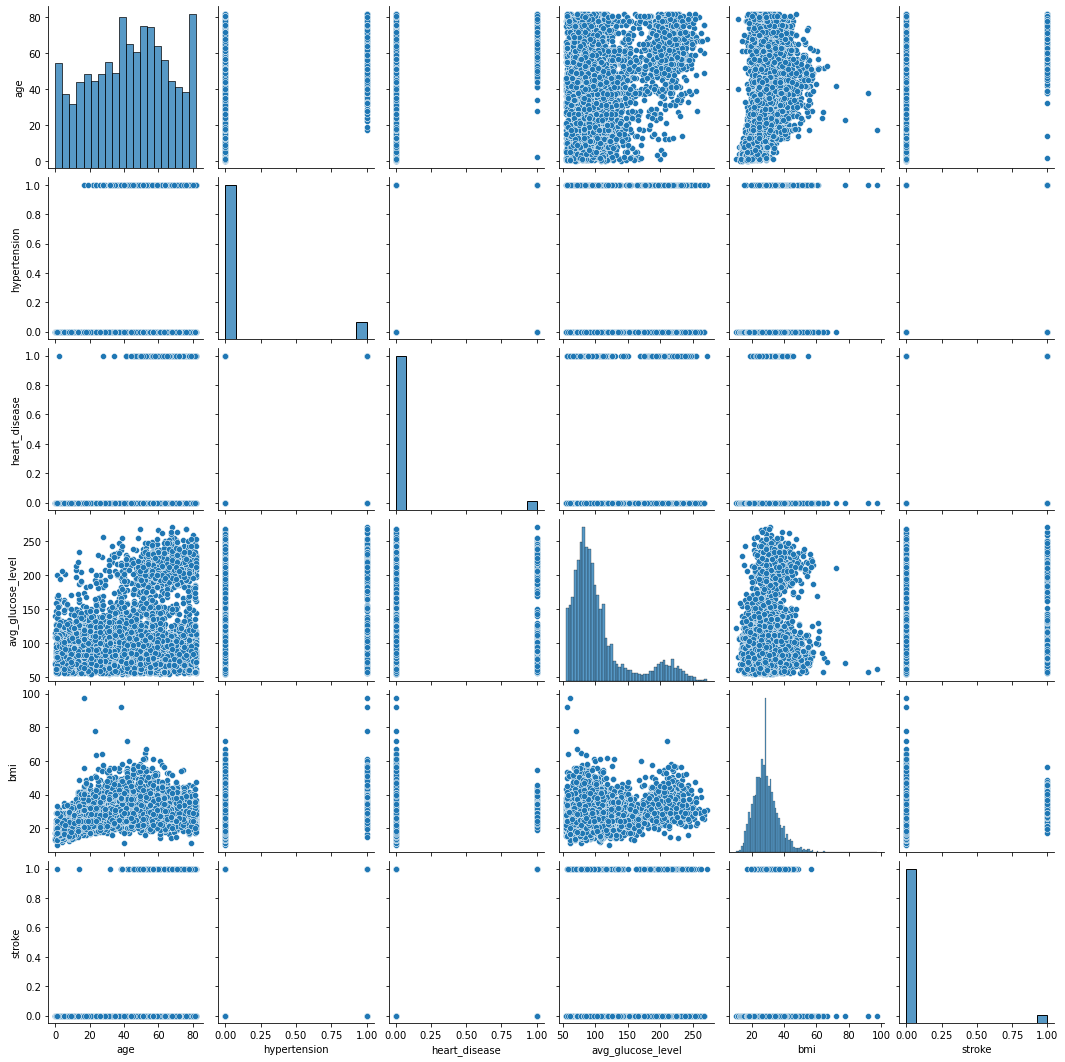

In [17]:
#Visualising corelations
sns.pairplot(stroke_data)

<AxesSubplot:>

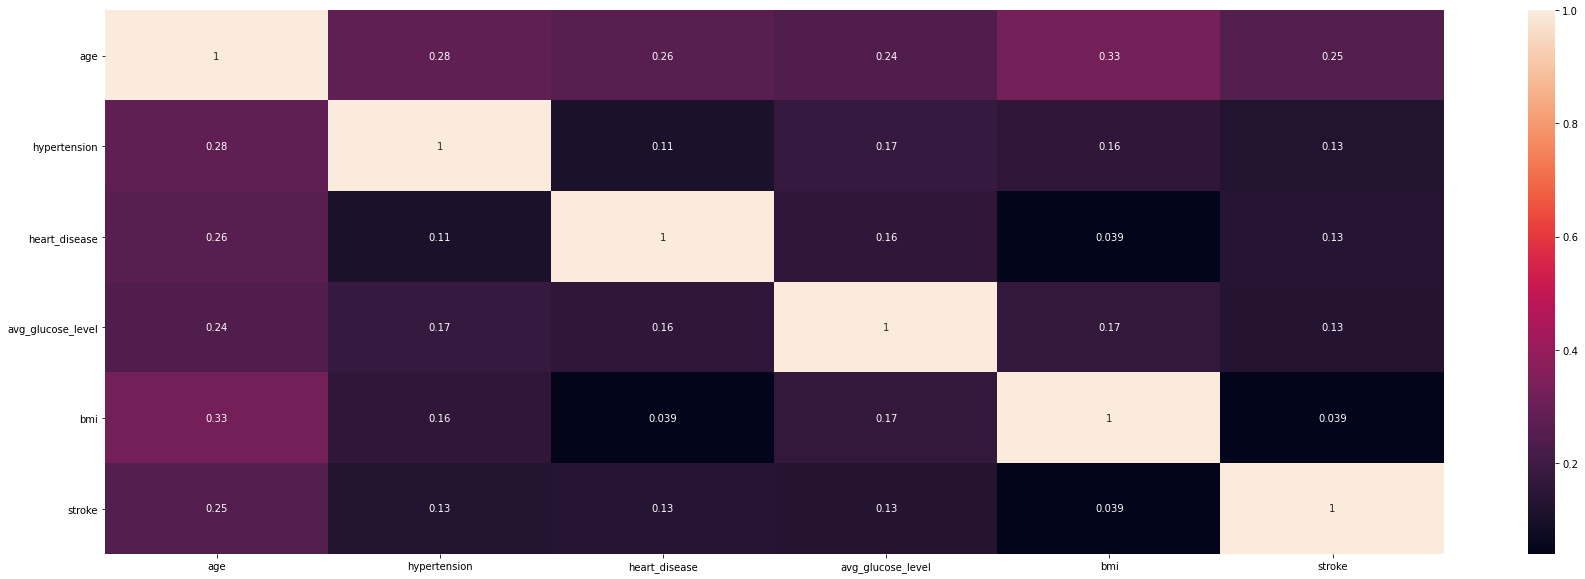

In [18]:
#Heatmap of the data
plt.figure(figsize=(30,10))
sns.heatmap(stroke_data.corr(), annot=True)

#### Observation: 

    The data is not showing strong corlation between stroke and the other biological features. 
    Max corelation coefficient is 0.25 between stroke and age while hypertension,heart disease, 
    and average glucose level, all have corelation coefficient of 0.13 indicating equal likliness 
    of stroke for people with these conditions. 

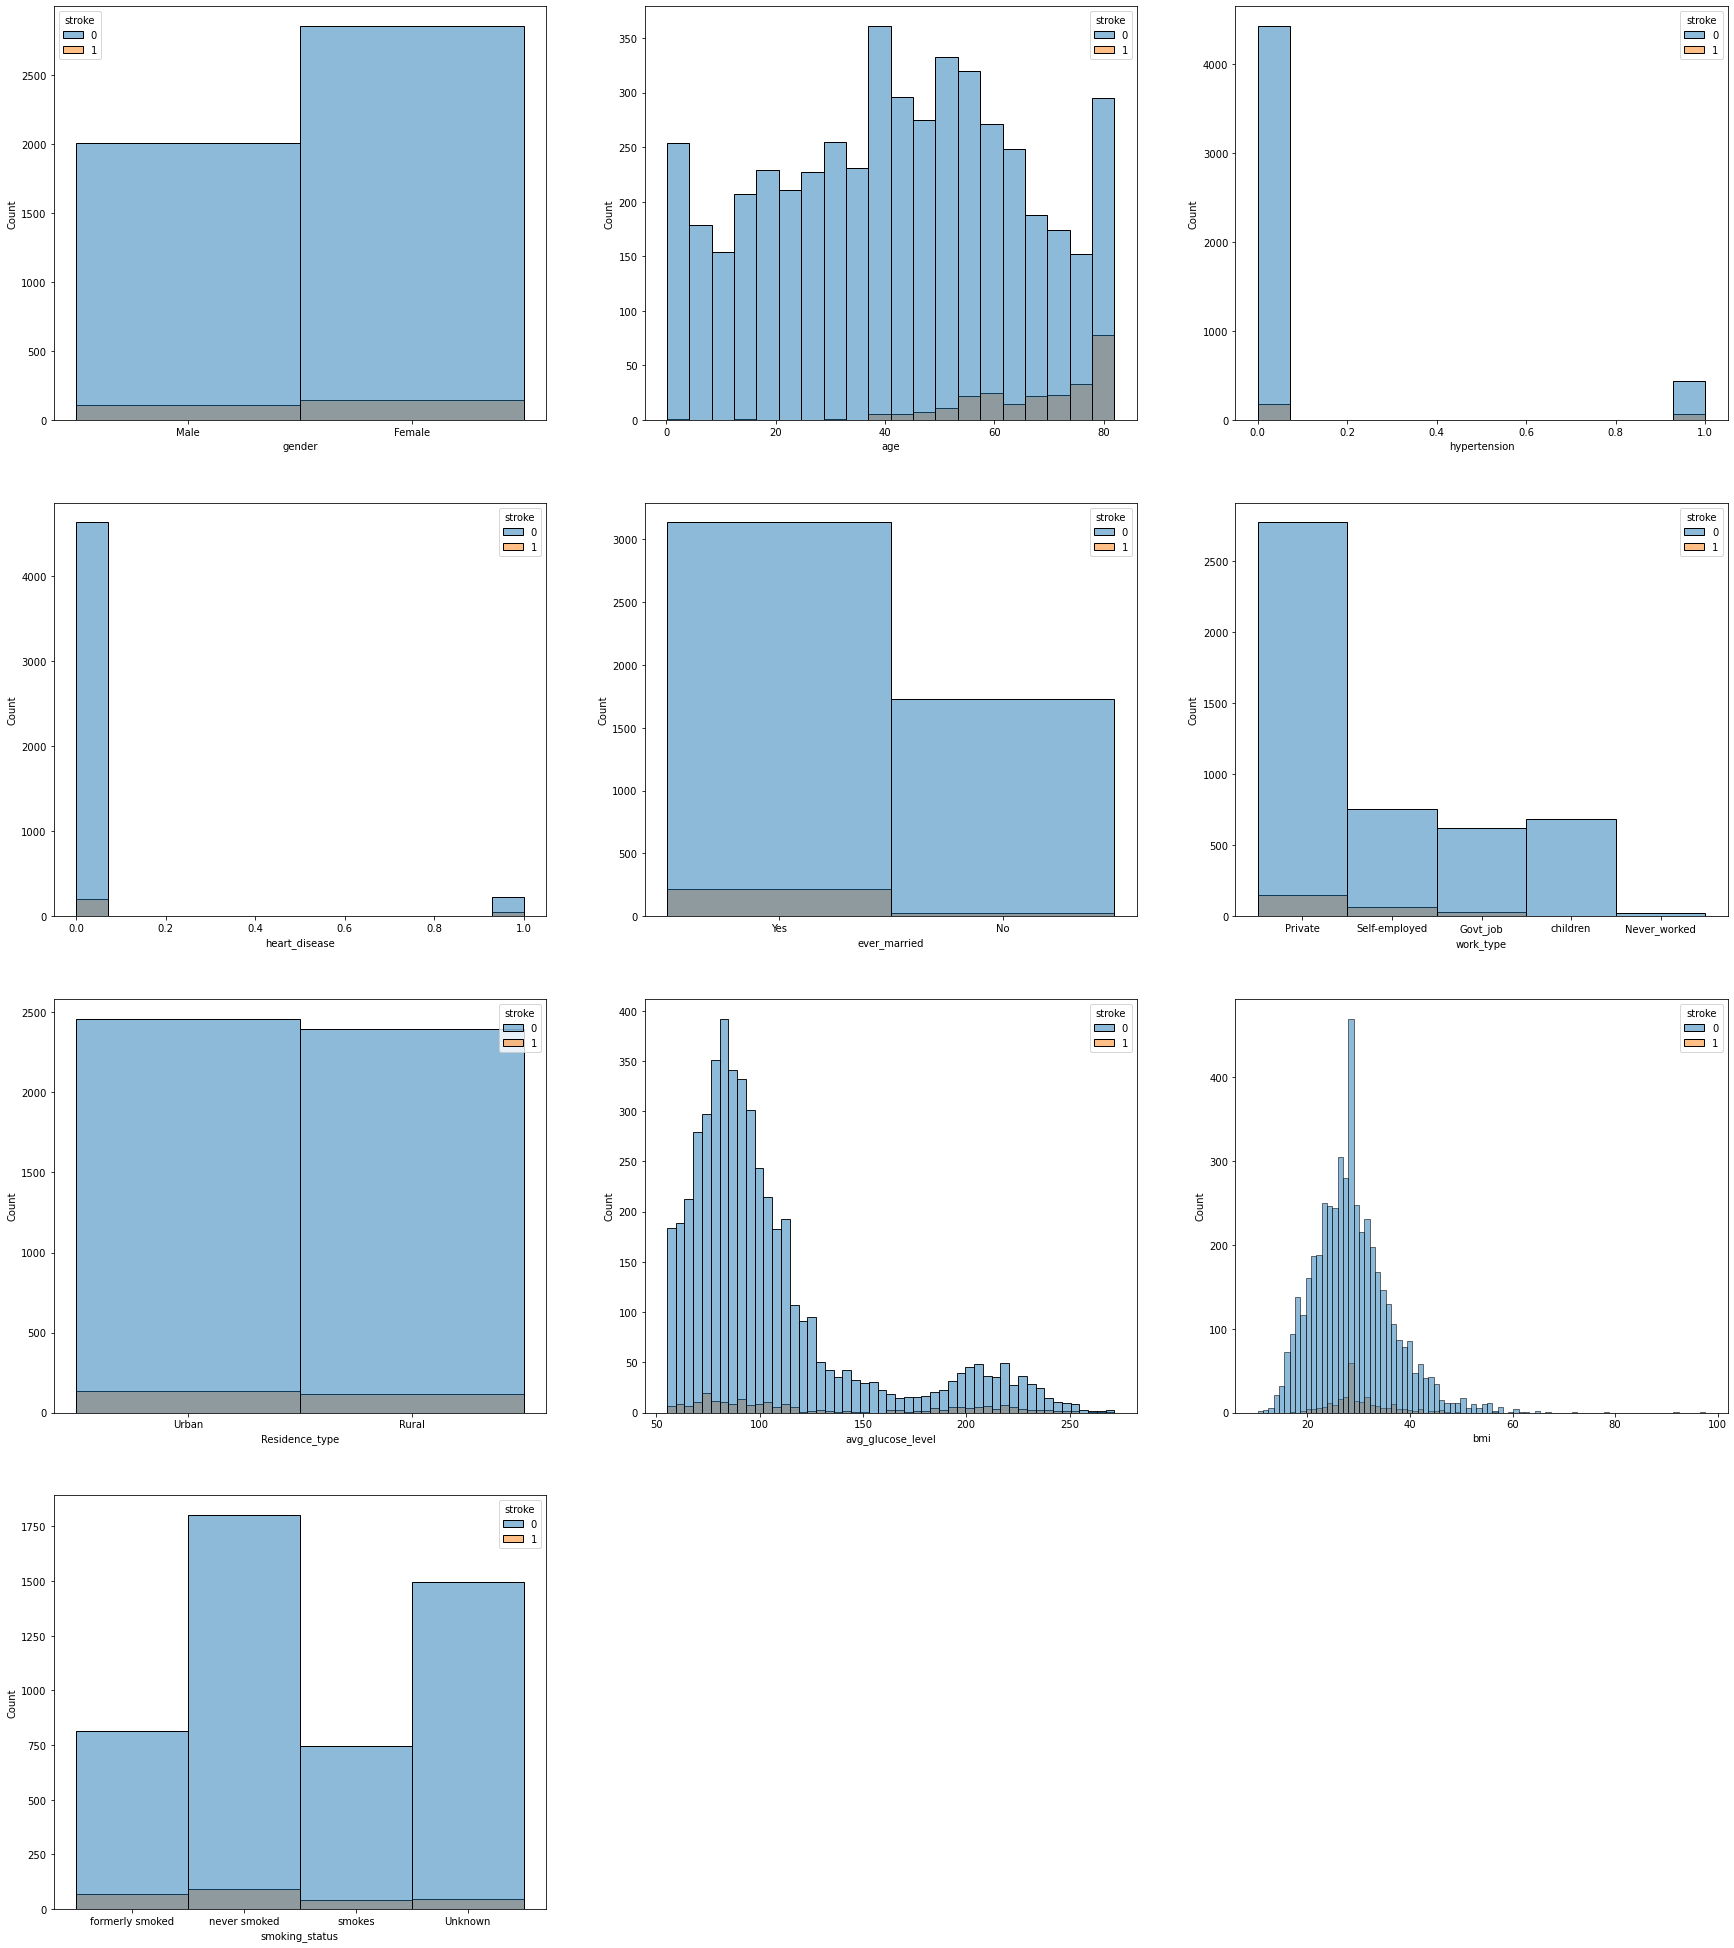

In [19]:
#Subset of data to exclude the 'stroke' column
X = stroke_data.drop(['stroke'], axis=1)

#Plotting the relations between features
plt.figure(figsize=(30,35))
p = 0
for feature in X.columns:
    p+=1
    plt.subplot(4,3,p)
    sns.histplot(stroke_data, x=feature, hue='stroke')
    
plt.show()


#### Observations:
    There seems to be greater chance of getting stroke in people 
        - between the age group of 60-80 with chances increasing more for people who are 80years
        - with bmi of 25 and more
        - with average glucaose level between 60-120
        - who have formerly smoked 
        - with heart disease
        - who are male

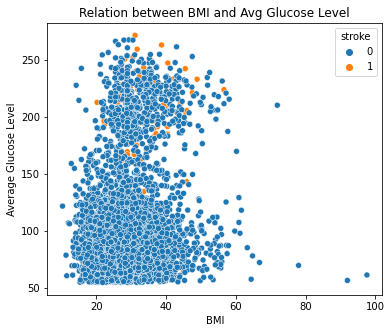

In [20]:
#Plot correlation between continuous numeric variables bmi, avg_glucose_level 
plt.figure(figsize=(6,5))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_data, hue='stroke')
plt.title('Relation between BMI and Avg Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()

#### Observation:
    People with BMI between 30-60 and Average Glucose Level of more than 130 are more likely to get stroke

### Exploring the effect of the categorical variables

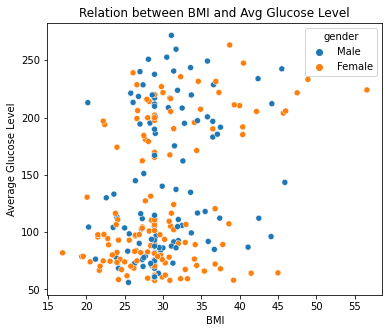

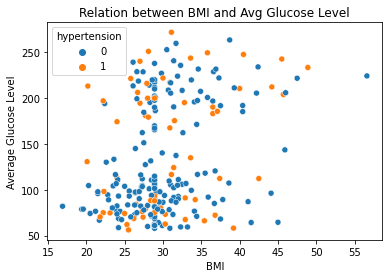

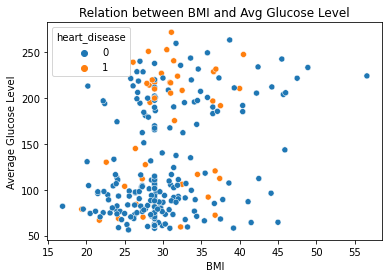

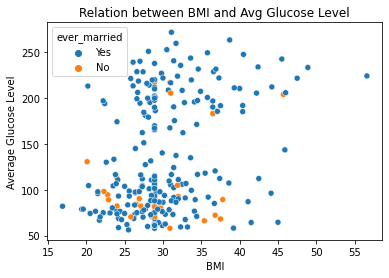

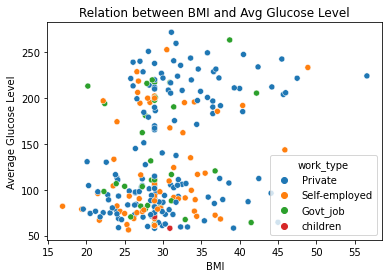

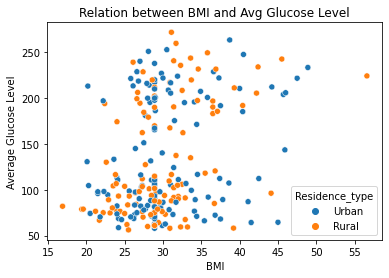

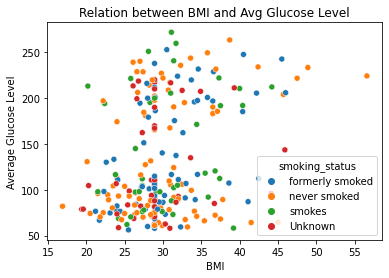

In [21]:
#Plot the effect of other categorical variables
df = stroke_data.loc[stroke_data['stroke']==1]
plt.figure(figsize=(6,5))

for i in ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status']:
    sns.scatterplot(x='bmi', y='avg_glucose_level', data=df, hue=i)
    plt.title('Relation between BMI and Avg Glucose Level')
    plt.xlabel('BMI')
    plt.ylabel('Average Glucose Level')
    plt.show()

Observation:
    People more likely to get stroke are:
    - men with BMI higher than 25 and glucose level higher than 160
    - people with hypertension and BMI higher than 25 and glucose level higher than 160
    - people with heart disease
    - married people as comapared to never married
    - people with work type private and BMI higher than 25 and glucose level higher than 160

 ### Encoding categorical variable

In [22]:
# Convert categorical data into dummy or 
stroke_data = pd.get_dummies(stroke_data)
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.9,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
# Reordering the DataFrameccolumns
reorder = list(stroke_data.columns)
reorder.remove('stroke')
reorder.append('stroke')
stroke_data = stroke_data[reorder]

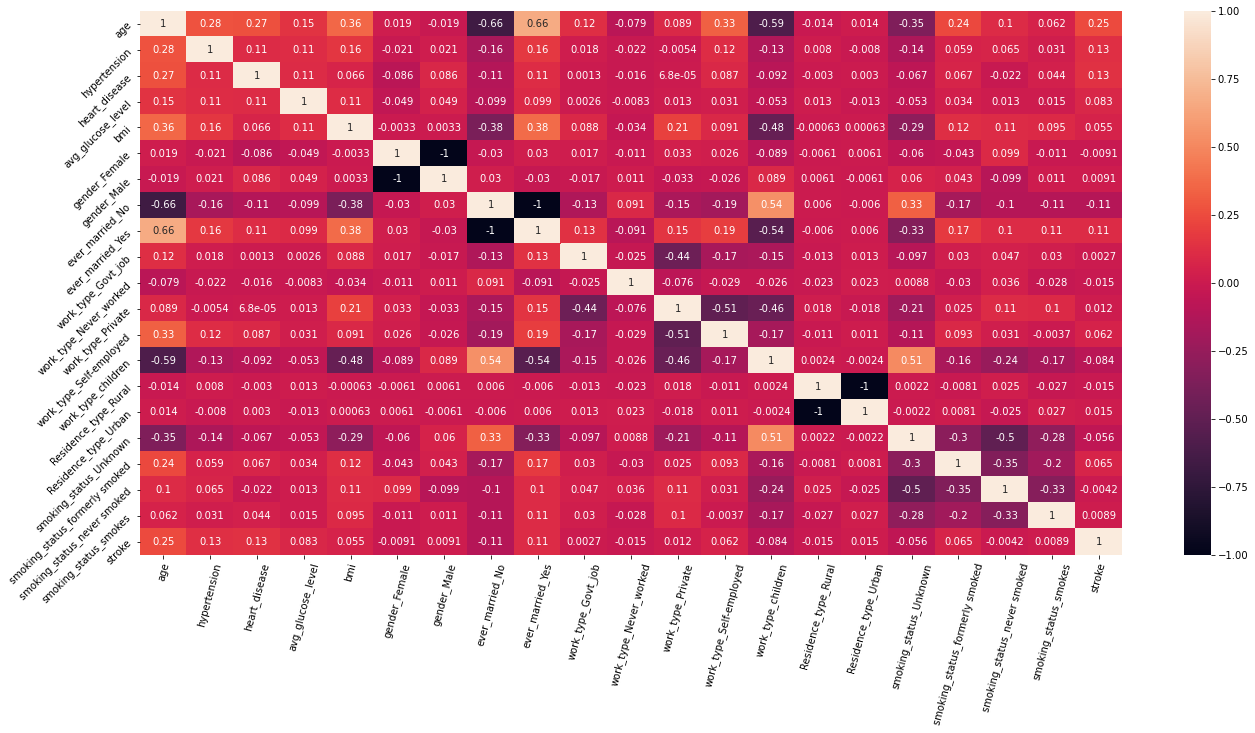

In [54]:
# Determine the strength and the direction of the relationship using Spearman Rank Corelation Coefficient 

plt.figure(figsize = (22,10))
rho = stroke_data.corr(method = 'spearman')

sns.heatmap(rho, annot = True)
plt.xticks(rotation=75)
plt.yticks(rotation=45)
plt.show()

#### Summary:

The data set had 12 colums and 5109 rows.                                                                             
The data is mostly categorical except for 'age', 'bmi' and 'average_glucose_level'                                    
The id column was dropped and the exploration was done on 11 columns and 5019 rows.                                   
The BMI column had some missing values.                                                                               
The row values corresponding to the missing values were analysed and were found significant.
The missing values were replaced with the mean values of the BMI since most of the values in BMI column are distributed around the mean.                                                                                           
The corelation matrix and the heatmap on all of the data didnot show very strong relationship between any of the features.
On plotting all of the features with respect to stroke it was observed that people between the age group of 60-80 have higher chance of getting stoke and it increases further for people who are 80years.                                   
On plotting 2 of the numeric features 'BMI' and 'Average glucose level' and the variable of interest ,'stroke', it was observed that people with BMI between 30-60 and Average Glucose Level of more than 130 are more likely to get stroke.
The effect of the remaining categorical features were observed against the 2 numeric features and possibility of stroke.                                                                                                               
A comparitively stronger corelation was observed between stroke and                                                   
        - BMI / Average glucose level with
            - hypertension
            - heart disease
            - marital status
            - smoking habits                                                                                           
